# Лабораторная работа номер 3

Выполнил: Стрельцов Илья Дмитриевич Б9122-01.03.02мкт

## Импорты

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
SEED = 5

## Генерация данных

In [3]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=SEED)

## Визуализация данных

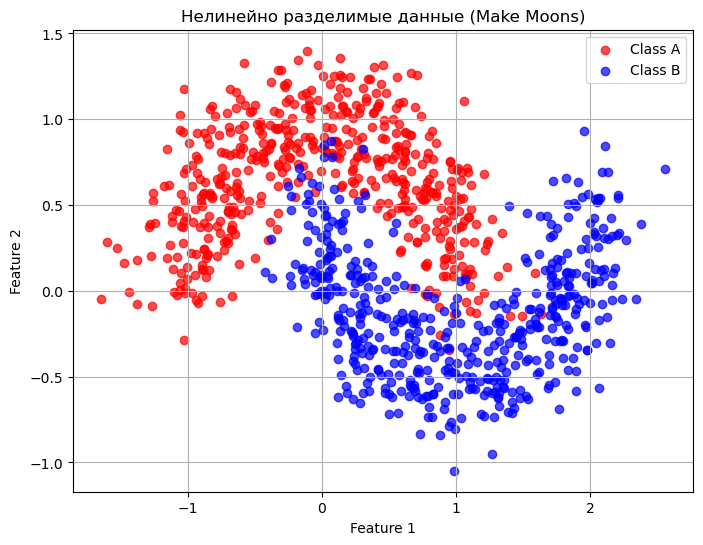

In [4]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', alpha=0.7, label='Class A')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', alpha=0.7, label='Class B')
plt.title('Нелинейно разделимые данные (Make Moons)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

## MLP модель

In [5]:
class MLP(nn.Module):
    def __init__(
            self,
            input_size=2,
            hidden_size=4,
            output_size=1
    ):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.output = nn.Linear(hidden_size, output_size)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.hidden(x))
        x = self.sigmoid(self.output(x))
        return x

## Разделение данных

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED, stratify=y
)

Нормализация

In [7]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

В тензоры

In [8]:
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train).reshape(-1, 1)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test).reshape(-1, 1)

Инициализация

In [9]:
model = MLP(input_size=2, hidden_size=4, output_size=1)
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

## Обучение модели

In [10]:
epochs = 1000
train_losses = []

for epoch in range(epochs):
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    if epoch % 100 == 0:
        print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}')

Epoch [0/1000], Loss: 0.6750
Epoch [100/1000], Loss: 0.3026
Epoch [200/1000], Loss: 0.2909
Epoch [300/1000], Loss: 0.2537
Epoch [400/1000], Loss: 0.1874
Epoch [500/1000], Loss: 0.1348
Epoch [600/1000], Loss: 0.1169
Epoch [700/1000], Loss: 0.1097
Epoch [800/1000], Loss: 0.1063
Epoch [900/1000], Loss: 0.1043


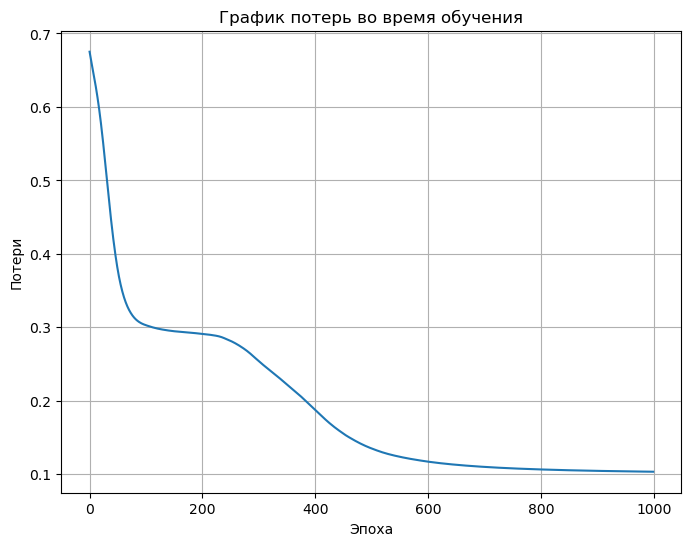

In [11]:
plt.figure(figsize=(8, 6))
plt.plot(train_losses)
plt.title('График потерь во время обучения')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.grid(True)
plt.show()

## Оценка точности

In [12]:
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    predicted = (test_outputs > 0.5).float()
    accuracy = (predicted == y_test_tensor).float().mean()

print(f'Точность на тестовом наборе: {accuracy.item() * 100:.2f}%')

Точность на тестовом наборе: 95.00%


Визуализация границы принятия решений

In [13]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))

    X_grid = np.c_[xx.ravel(), yy.ravel()]
    X_grid_tensor = torch.FloatTensor(scaler.transform(X_grid))

    with torch.no_grad():
        Z = model(X_grid_tensor)
        Z = (Z > 0.5).float().numpy()

    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.RdYlBu)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red', alpha=0.7, label='Class 0')
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue', alpha=0.7, label='Class 1')
    plt.title('Граница принятия решений MLP')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()

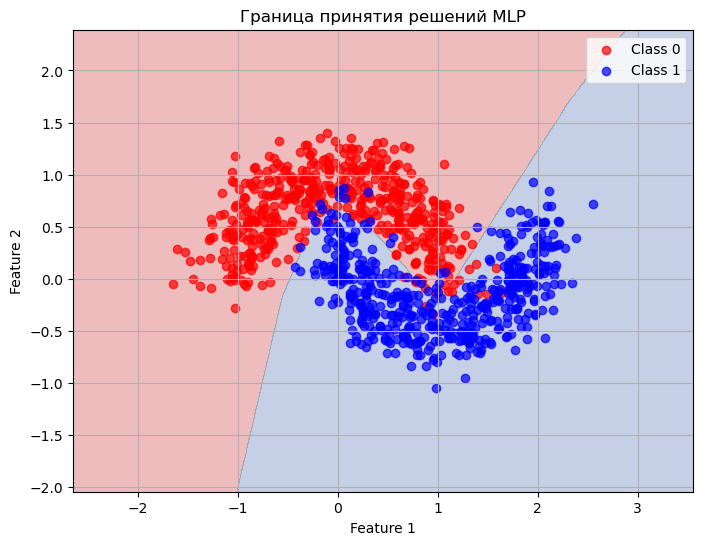

In [14]:
plot_decision_boundary(model, X, y)

## MLP для решение задачи XOR

Данные

In [24]:
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=np.float32)
y_xor = np.array([[0], [1], [1], [0]], dtype=np.float32)

Визуализация

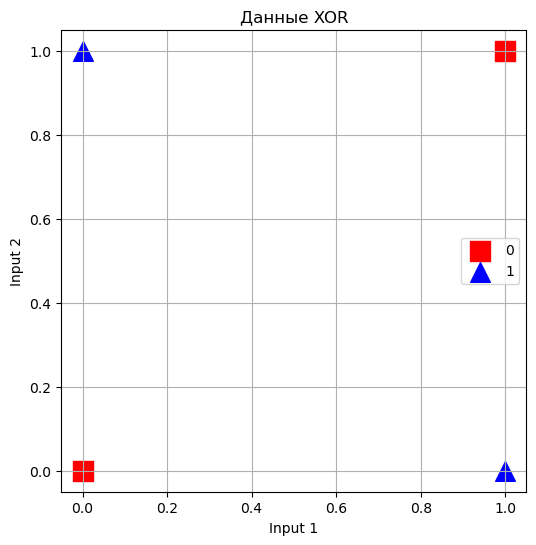

In [25]:
plt.figure(figsize=(6, 6))
plt.scatter(X_xor[y_xor.ravel() == 0, 0], X_xor[y_xor.ravel() == 0, 1],
            color='red', s=200, marker='s', label='0')
plt.scatter(X_xor[y_xor.ravel() == 1, 0], X_xor[y_xor.ravel() == 1, 1],
            color='blue', s=200, marker='^', label='1')
plt.title('Данные XOR')
plt.xlabel('Input 1')
plt.ylabel('Input 2')
plt.legend()
plt.grid(True)
plt.show()

Создание модели

In [36]:
model_xor = MLP(input_size=2, hidden_size=4, output_size=1)
criterion_xor = nn.BCELoss()
optimizer_xor = optim.Adam(model_xor.parameters(), lr=0.1)

X_xor_tensor = torch.FloatTensor(X_xor)
y_xor_tensor = torch.FloatTensor(y_xor)

Обучение

In [37]:
xor_losses = []
epochs_xor = 500

for epoch in range(epochs_xor):
    outputs = model_xor(X_xor_tensor)
    loss = criterion_xor(outputs, y_xor_tensor)

    optimizer_xor.zero_grad()
    loss.backward()
    optimizer_xor.step()

    xor_losses.append(loss.item())

    if epoch % 100 == 0:
        print(f'Epoch [{epoch}/{epochs_xor}], Loss: {loss.item():.4f}')

Epoch [0/500], Loss: 0.6746
Epoch [100/500], Loss: 0.0005
Epoch [200/500], Loss: 0.0002
Epoch [300/500], Loss: 0.0001
Epoch [400/500], Loss: 0.0001


Тестирование

In [38]:
with torch.no_grad():
    test_outputs = model_xor(X_xor_tensor)
    predicted = (test_outputs > 0.5).float()

    print("\nРезультаты XOR:")
    for i in range(len(X_xor)):
        print(f"Input: {X_xor[i]} -> Target: {y_xor[i][0]}, "
              f"Predicted: {test_outputs[i].item():.4f} -> {predicted[i].item()}")

    accuracy_xor = (predicted == y_xor_tensor).float().mean()
    print(f"\nТочность на XOR: {accuracy_xor.item() * 100:.2f}%")


Результаты XOR:
Input: [0. 0.] -> Target: 0.0, Predicted: 0.0001 -> 0.0
Input: [0. 1.] -> Target: 1.0, Predicted: 1.0000 -> 1.0
Input: [1. 0.] -> Target: 1.0, Predicted: 0.9999 -> 1.0
Input: [1. 1.] -> Target: 0.0, Predicted: 0.0001 -> 0.0

Точность на XOR: 100.00%


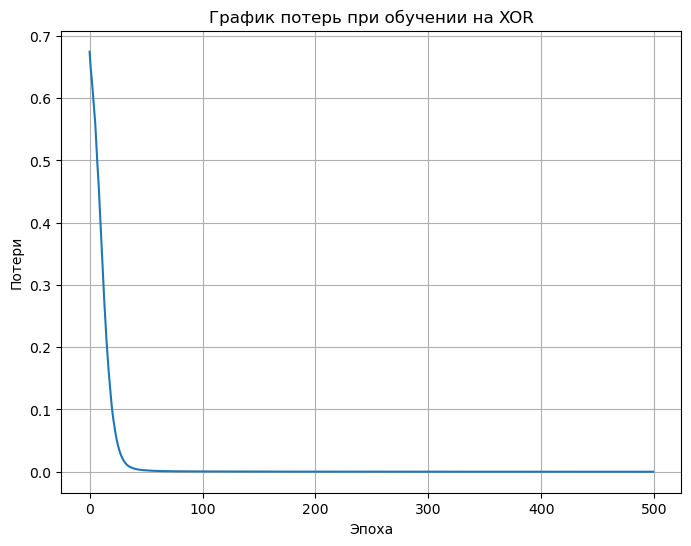

In [39]:
plt.figure(figsize=(8, 6))
plt.plot(xor_losses)
plt.title('График потерь при обучении на XOR')
plt.xlabel('Эпоха')
plt.ylabel('Потери')
plt.grid(True)
plt.show()